In [1]:
from datasets import load_dataset
from taker import Model
from taker.texts import prepare_dataset, infer_dataset_config

In [2]:
m = Model("mistralai/Mistral-7B-Instruct-v0.2")
c = infer_dataset_config("pile")
d = prepare_dataset(c)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

- Loaded mistralai/Mistral-7B-Instruct-v0.2
 - Registered 32 Attention Layers


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

In [3]:
for data in d:
    print(data)
    break

{'text': 'Roman Catholic Diocese of Tambacounda\n\nThe Roman Catholic Diocese of Tambacounda () is a diocese located in the city of Tambacounda in the Ecclesiastical province of Dakar in Senegal.\n\nHistory\n August 13, 1970: Established as Apostolic Prefecture of Tambacounda from the Diocese of Kaolack and Diocese of Saint-Louis du Sénégal\n April 17, 1989: Promoted as Diocese of Tambacounda\n\nSpecial churches\n The cathedral is Cathédrale Marie Reine de l’Univers in Tambacounda, which is located in the Medina Coura neighborhood of the town.\n\nLeadership\n Bishops of Tambacounda (Roman rite)\n Bishop Jean-Noël Diouf (since 1989.04.17)\n Prefects Apostolic of Tambacounda (Roman rite) \n Fr. Clément Cailleau, C.S.Sp. (1970.08.13 – 1986.04.24)\n\nSee also\nRoman Catholicism in Senegal\n\nReferences\n\nExternal links\n GCatholic.org\n Catholic Hierarchy \n\nCategory:Roman Catholic dioceses in Senegal\nCategory:Tambacounda\nCategory:Christian organizations established in 1970\nCategory:R

In [4]:
res = m.get_residual_stream(data["text"])

/tmp/ipykernel_221832/4207714418.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  dot_products[i, j] = normed(res[layer][i].T) @ normed(res[layer][j])


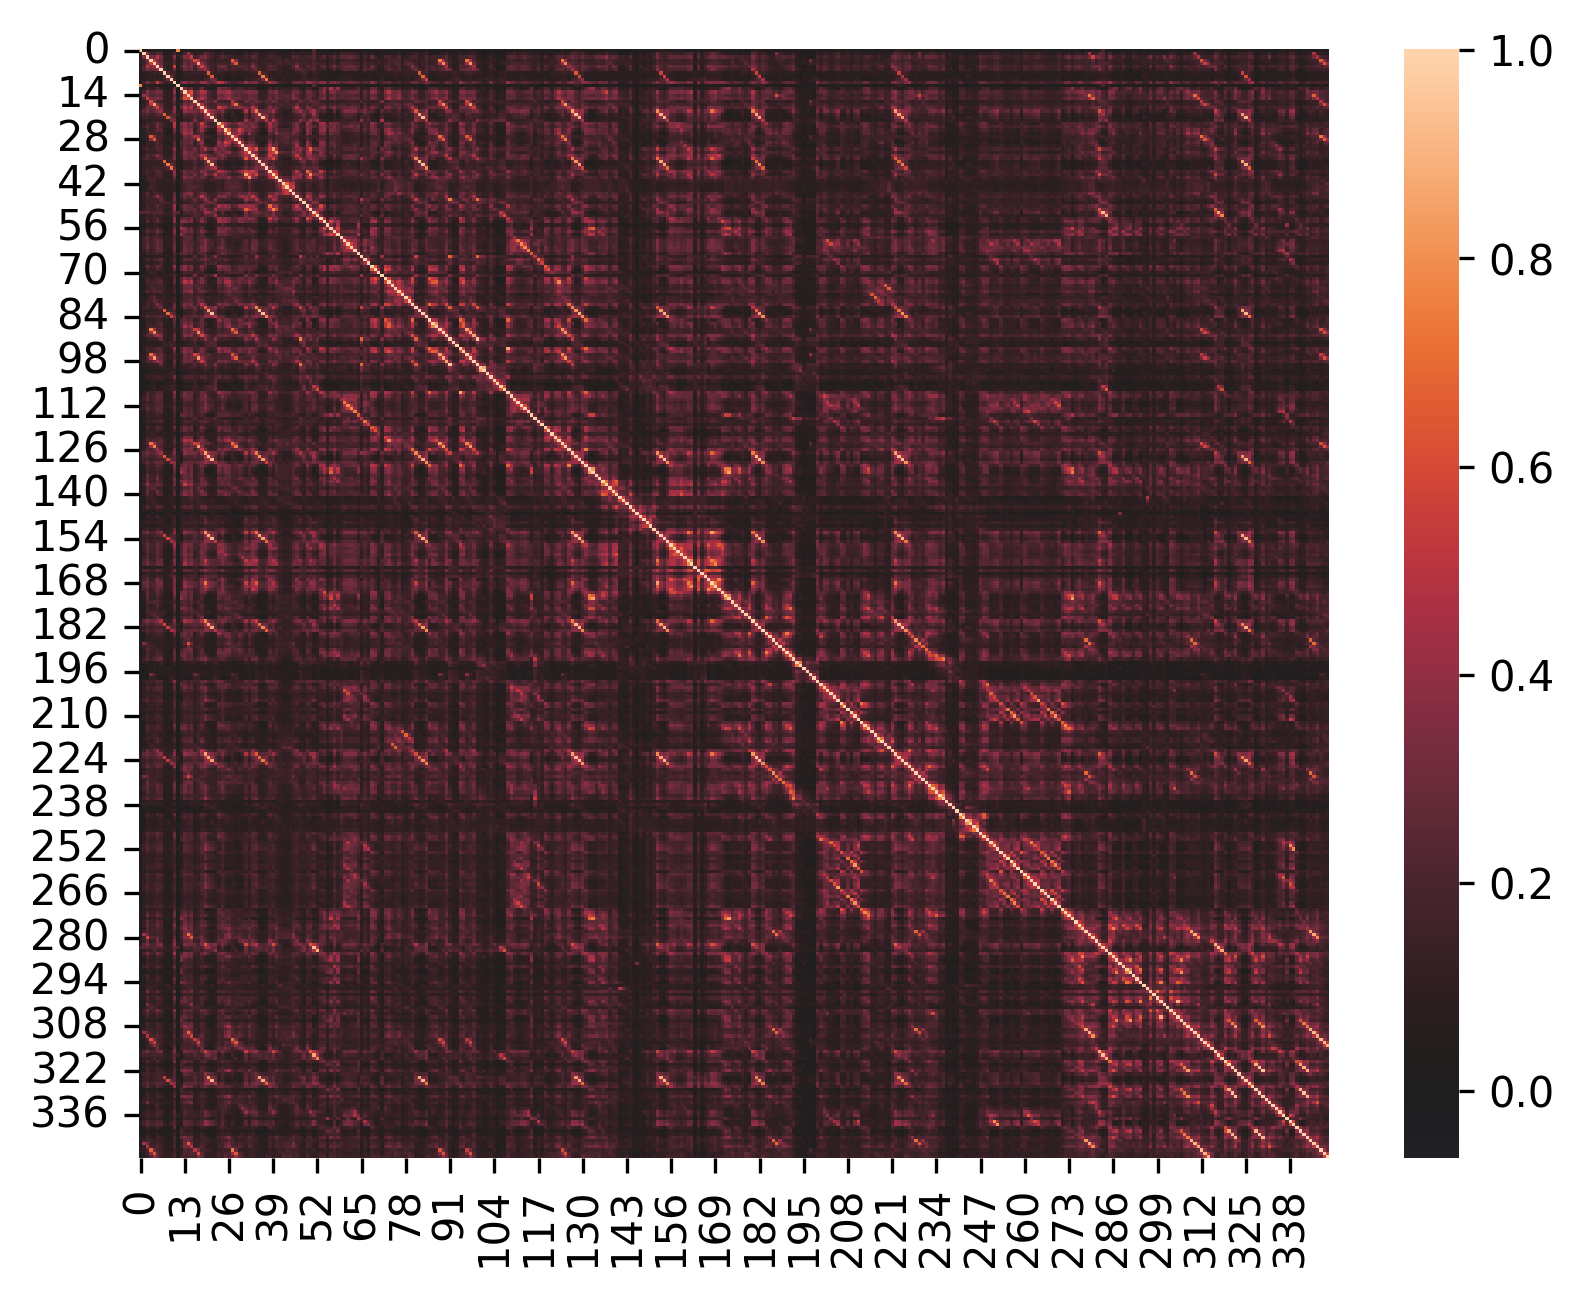

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def normed(t):
    return t / t.norm()
n = 350
for layer in [len(res)-5]:
    dot_products = torch.zeros([n, n])
    for i in range(n):
        for j in range(n):
            dot_products[i, j] = normed(res[layer][i].T) @ normed(res[layer][j])
    sns.heatmap(dot_products, center=0)
    plt.show()

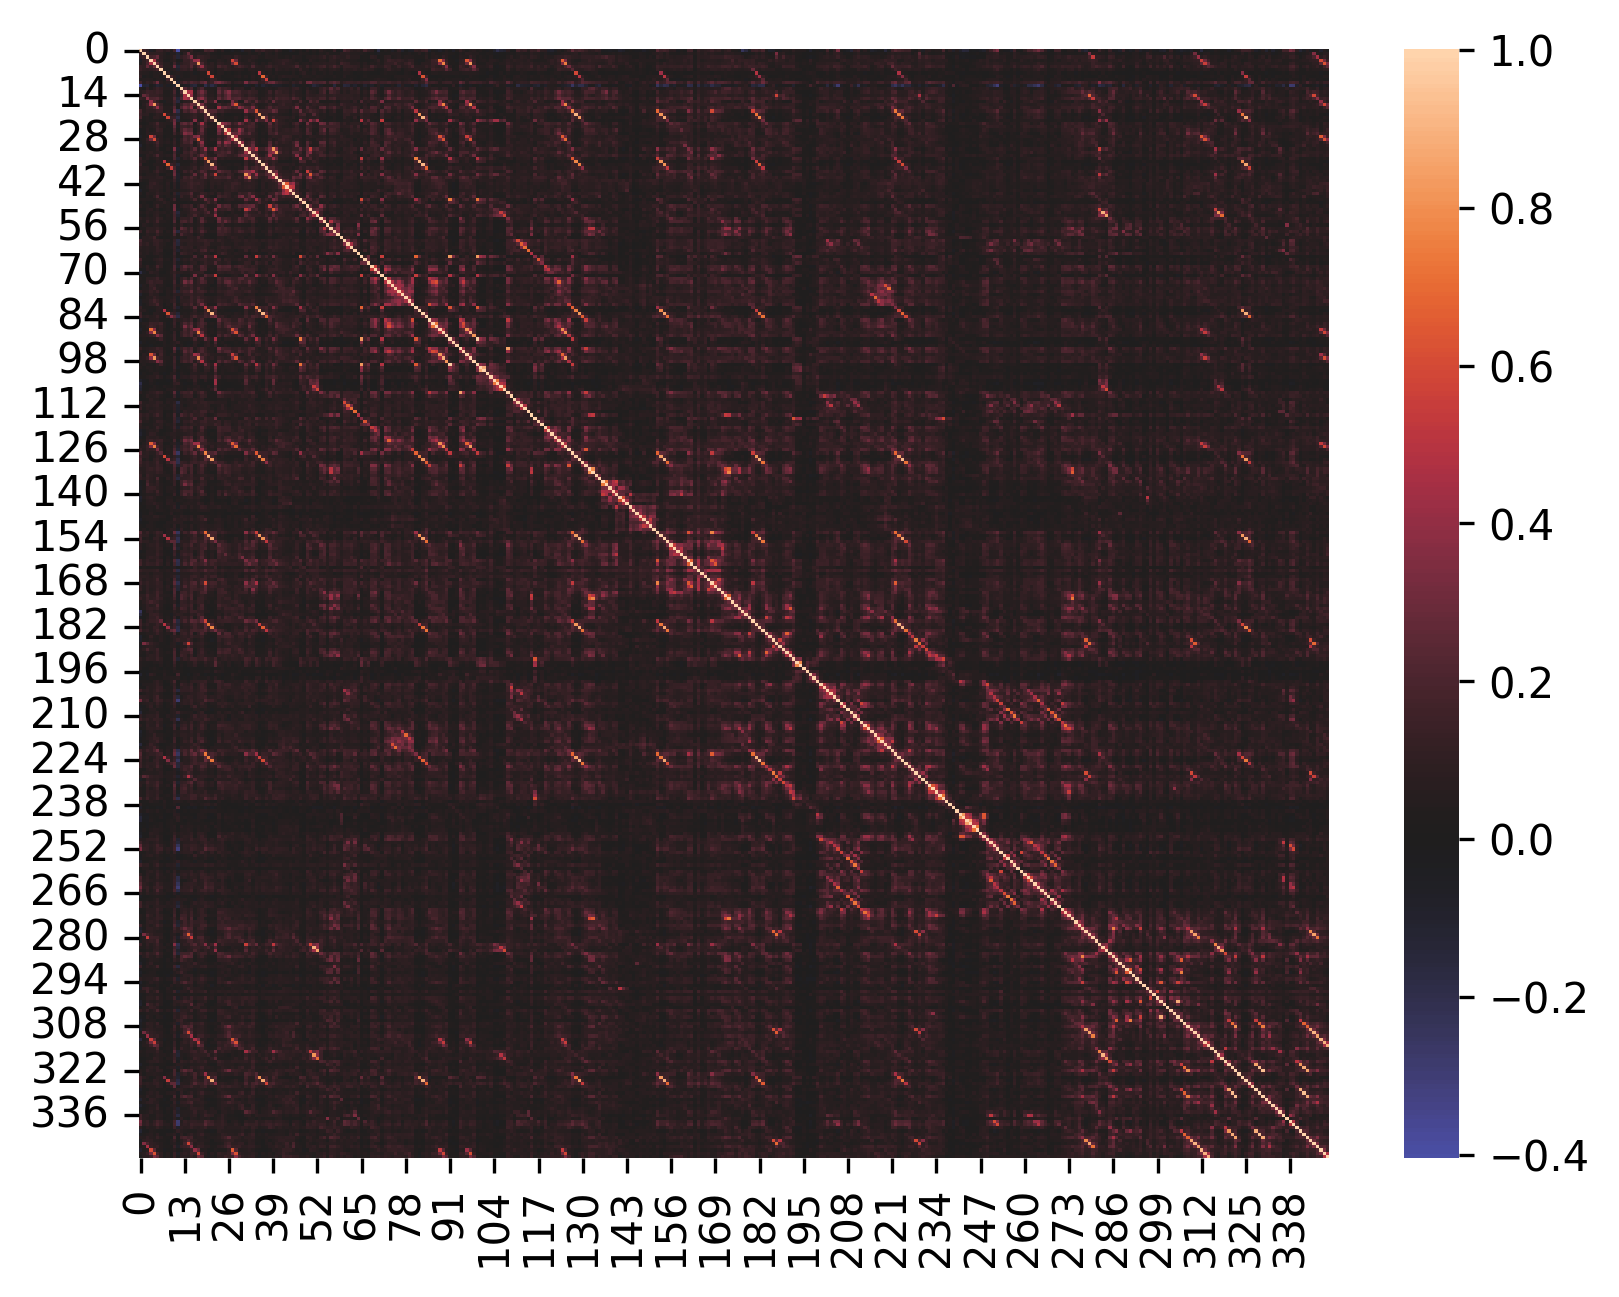

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import torch

def normed(t):
    return t / t.norm()
n = 350
for layer in [len(res)-10]:
    dot_products = torch.zeros([n, n])
    for i in range(n):
        for j in range(n):
            dot_products[i, j] = \
                  normed(res[layer][i].T - res[layer-2][i].T) \
                @ normed(res[layer][j]   - res[layer-2][j])
    sns.heatmap(dot_products, center=0)
    plt.show()

In [7]:
layer = 15
from welford_torch import Welford

vecs = []

for i in range(0, 350, 20):
    vec = (res[layer][i:i+20] - res[layer-2][i:i+20]).mean(dim=0)
    vecs.append(vec)

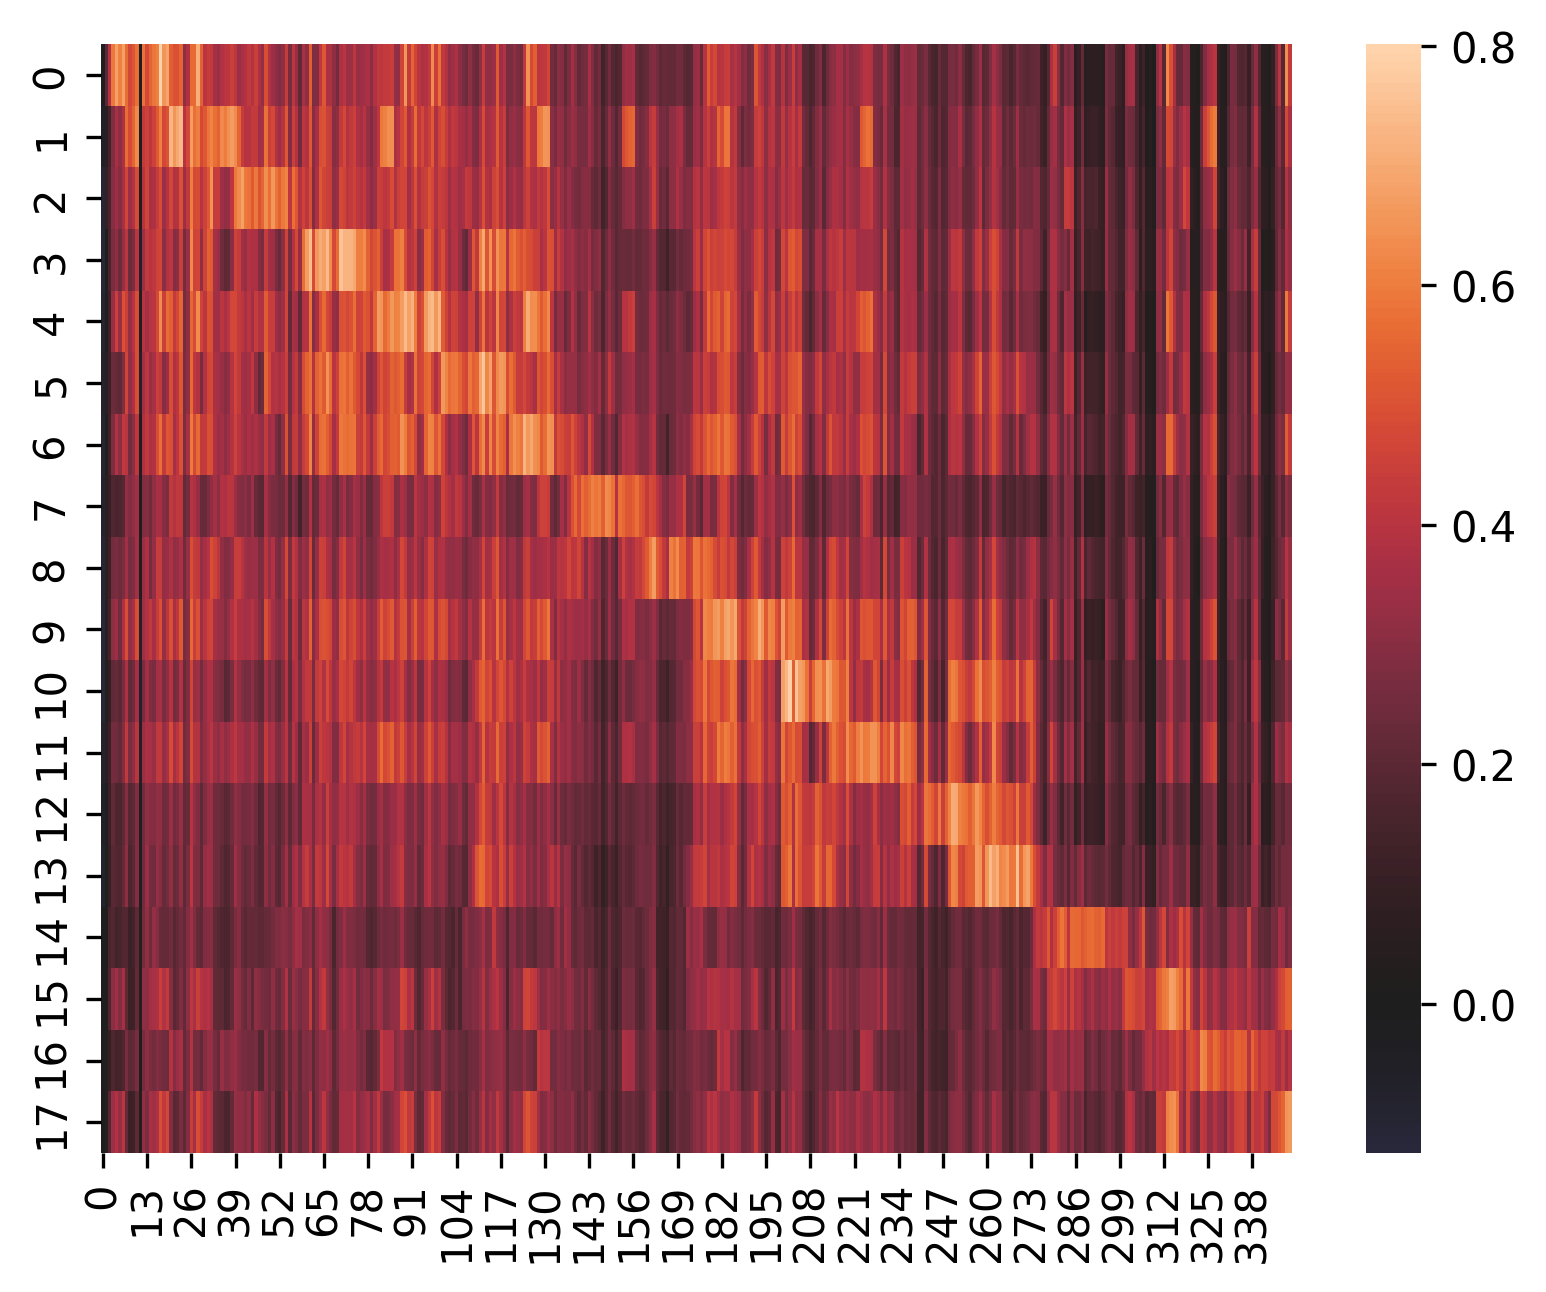

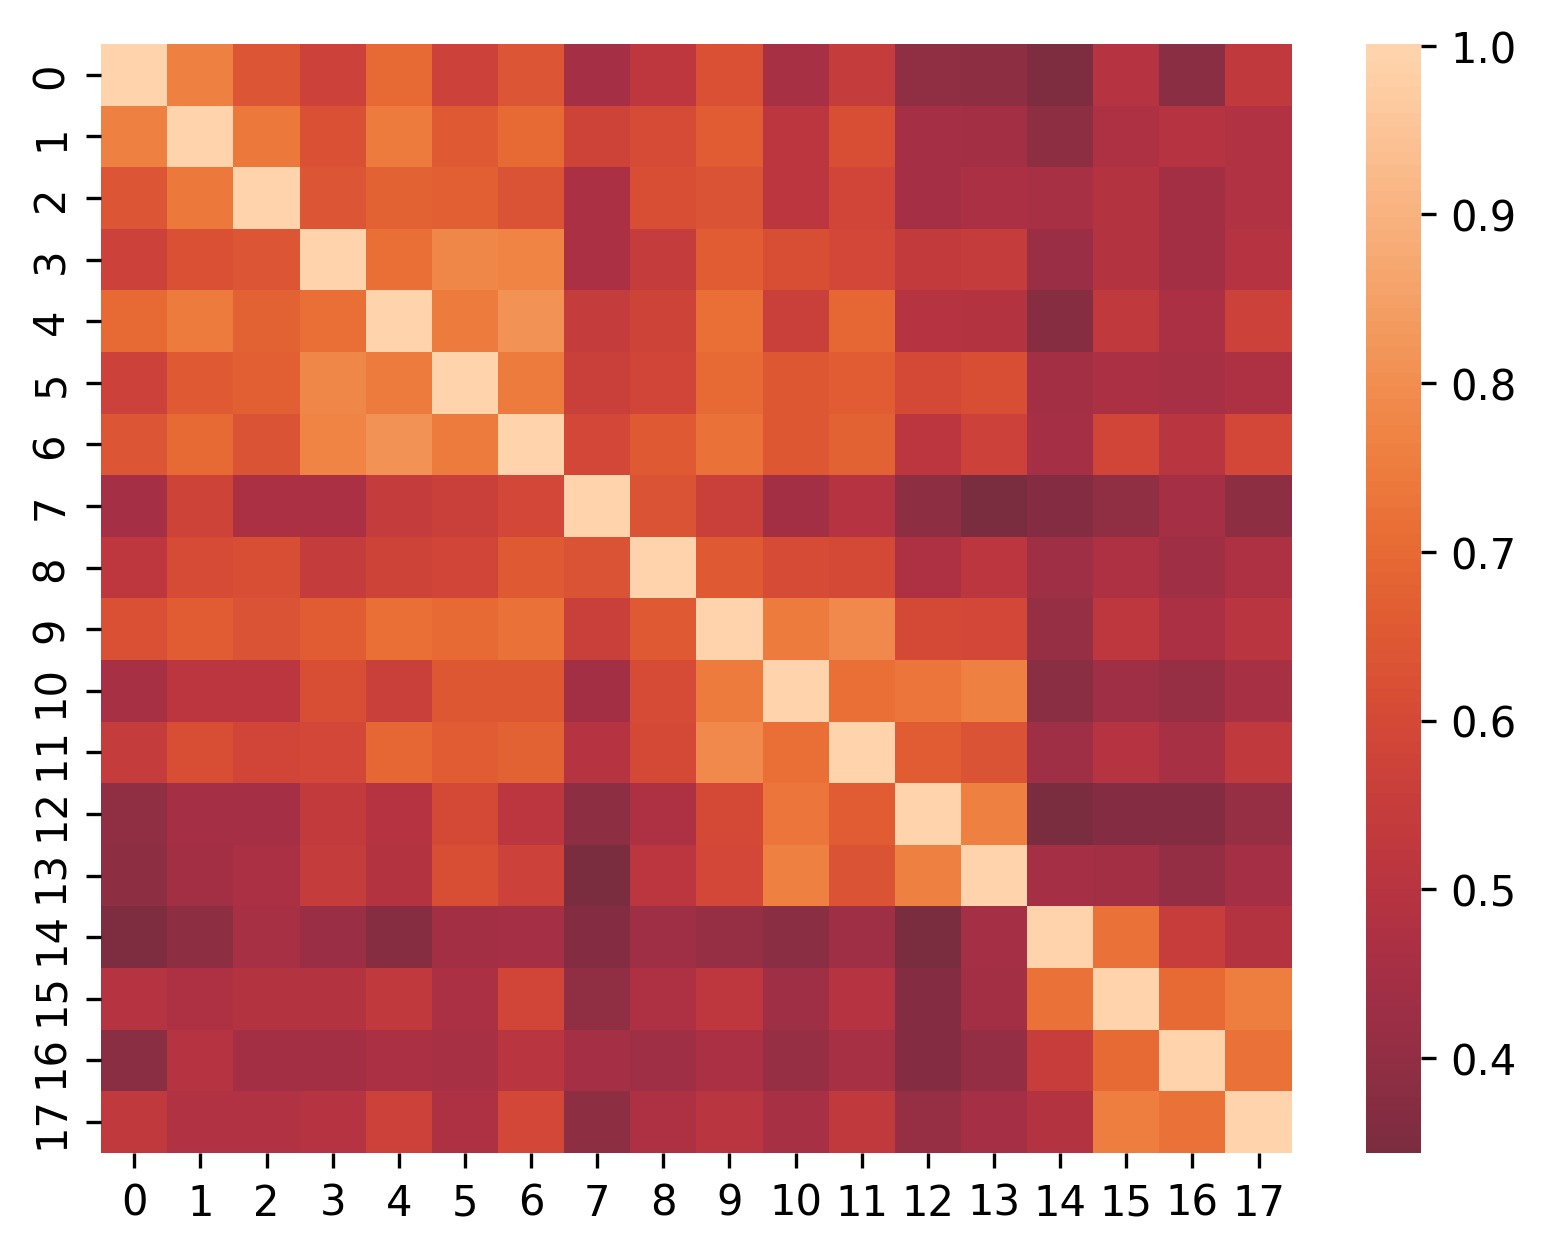

In [8]:
layer = 15
dot_products = torch.zeros([len(vecs), n])
for i in range(len(vecs)):
    for j in range(n):
        dot_products[i, j] = \
                normed(vecs[i].T) \
            @ normed(res[layer][j]   - res[layer-2][j])
sns.heatmap(dot_products, center=0)
plt.show()


dot_products = torch.zeros([len(vecs), len(vecs)])
for i in range(len(vecs)):
    for j in range(len(vecs)):
        dot_products[i, j] = \
            normed(vecs[i].T) @ normed(vecs[j])
sns.heatmap(dot_products, center=0)
plt.show()

In [9]:
print(data["text"])

def get_centroids(text):
    res = m.get_residual_stream(text)
    layer = 15
    vecs = []
    for i in range(0, 350, 20):
        vec = (res[layer][i:i+20] - res[layer-2][i:i+20]).mean(dim=0)
        vecs.append(vec)

    return(vecs)

Roman Catholic Diocese of Tambacounda

The Roman Catholic Diocese of Tambacounda () is a diocese located in the city of Tambacounda in the Ecclesiastical province of Dakar in Senegal.

History
 August 13, 1970: Established as Apostolic Prefecture of Tambacounda from the Diocese of Kaolack and Diocese of Saint-Louis du Sénégal
 April 17, 1989: Promoted as Diocese of Tambacounda

Special churches
 The cathedral is Cathédrale Marie Reine de l’Univers in Tambacounda, which is located in the Medina Coura neighborhood of the town.

Leadership
 Bishops of Tambacounda (Roman rite)
 Bishop Jean-Noël Diouf (since 1989.04.17)
 Prefects Apostolic of Tambacounda (Roman rite) 
 Fr. Clément Cailleau, C.S.Sp. (1970.08.13 – 1986.04.24)

See also
Roman Catholicism in Senegal

References

External links
 GCatholic.org
 Catholic Hierarchy 

Category:Roman Catholic dioceses in Senegal
Category:Tambacounda
Category:Christian organizations established in 1970
Category:Roman Catholic dioceses and prelatures e

In [17]:

import numpy as np
cpu_vecs = np.array(torch.stack(vecs).cpu())

In [29]:
import phate
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize the PHATE operator
def plot_phate(vectors):
    phate_op = phate.PHATE()

    # Fit and transform the data
    data_phate = phate_op.fit_transform(vectors)

    # Plotting the PHATE result
    plt.scatter(data_phate[:, 0], data_phate[:, 1], cmap='Spectral', alpha=0.6)
    plt.title('PHATE Embedding of 5D Spiral Data')
    plt.xlabel('PHATE 1')
    plt.ylabel('PHATE 2')
    plt.colorbar(label='Point index')
    plt.show()



def plot_tsne(vectors):
    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Fit and transform the data to 2D
    data_tsne = tsne.fit_transform(vectors)

    # Plotting the t-SNE result
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], cmap='Spectral', alpha=0.6)
    plt.title('t-SNE Embedding of 5D Spiral Data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(label='Point index')
    plt.show()

Calculating PHATE...
  Running PHATE on 363 observations and 4096 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.35 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 0.23 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.26 seconds.
Calculated PHATE in 1.90 seconds.


/tmp/ipykernel_221832/3512312992.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_phate[:, 0], data_phate[:, 1], cmap='Spectral', alpha=0.6)


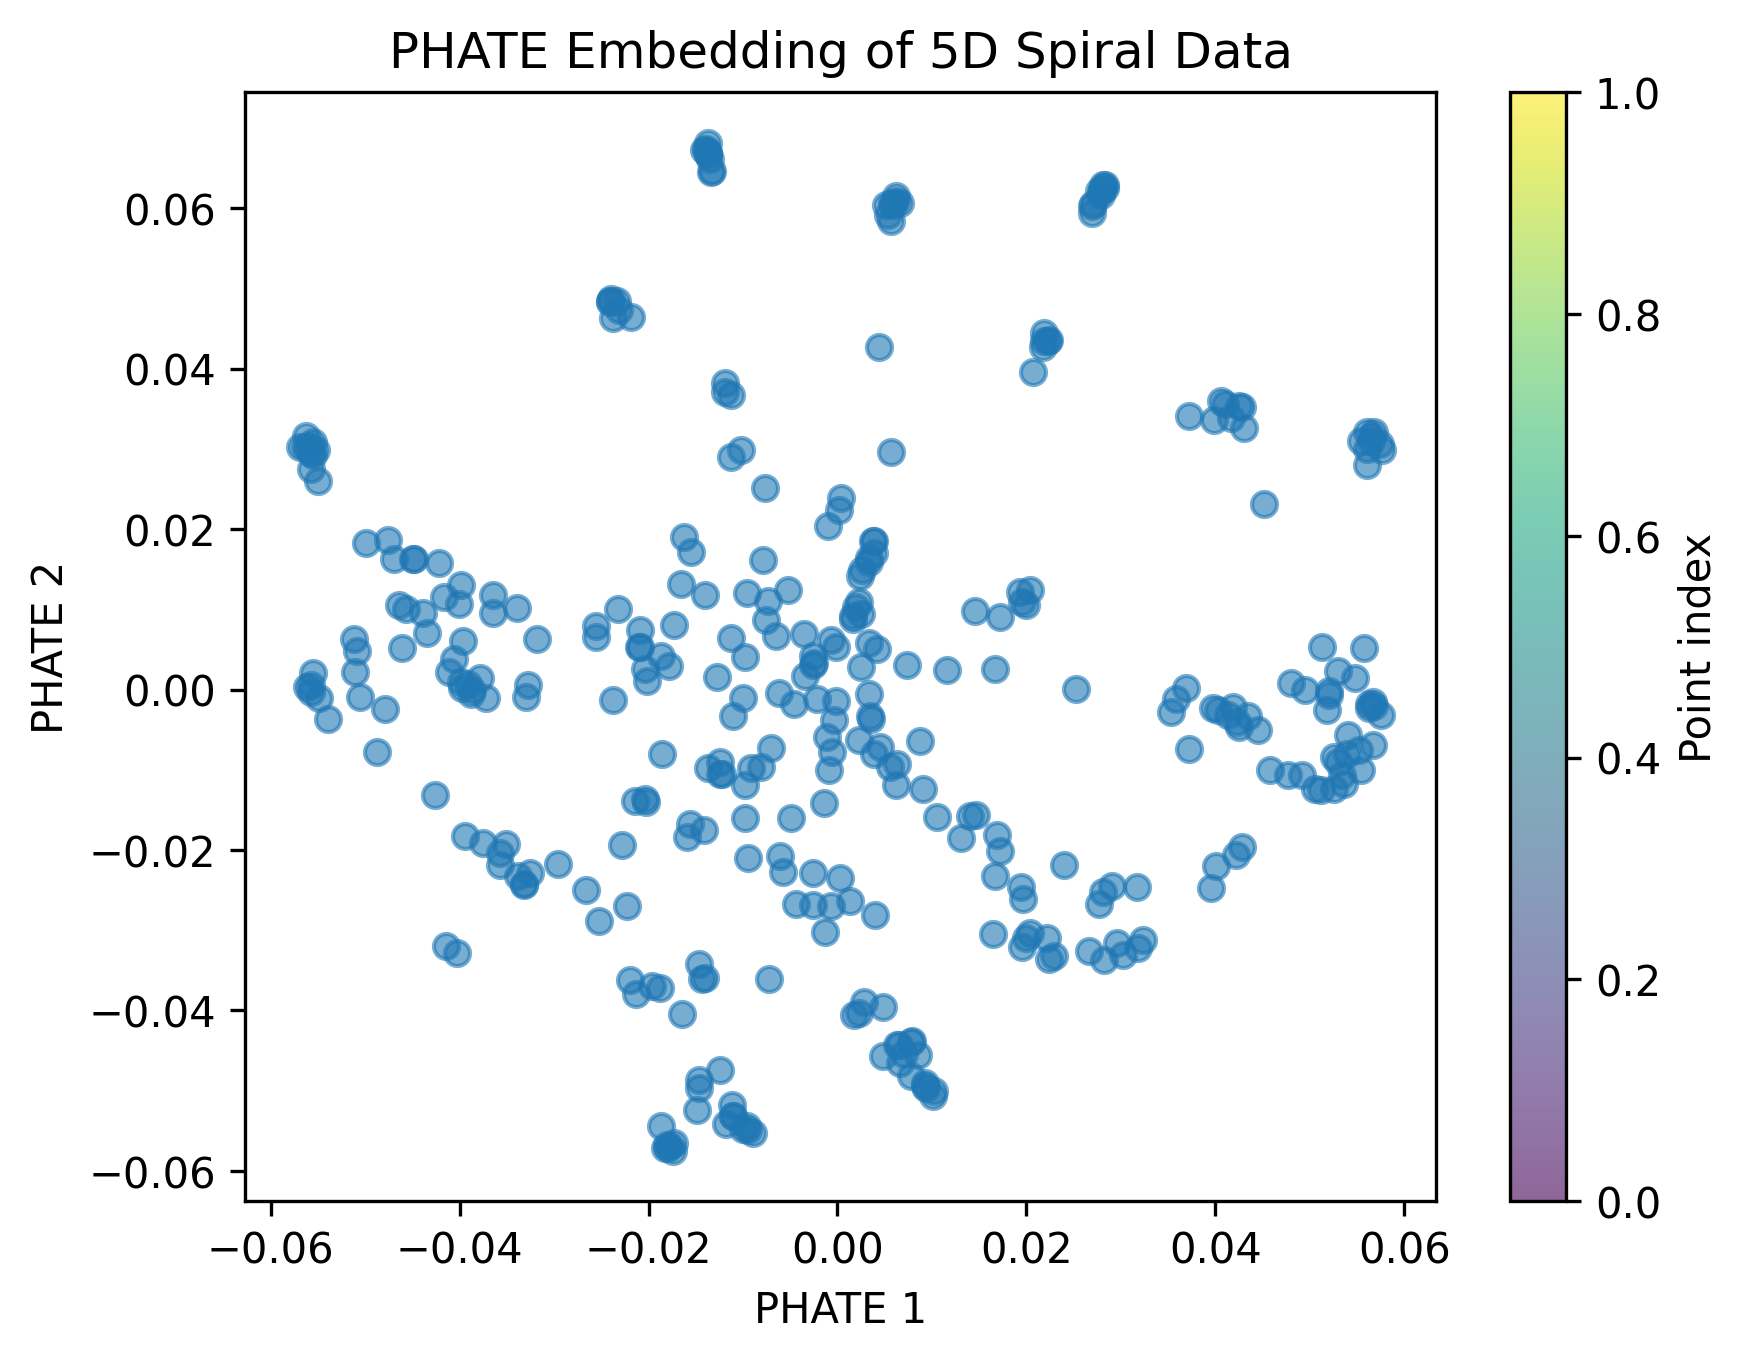

/tmp/ipykernel_221832/3512312992.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_tsne[:, 0], data_tsne[:, 1], cmap='Spectral', alpha=0.6)


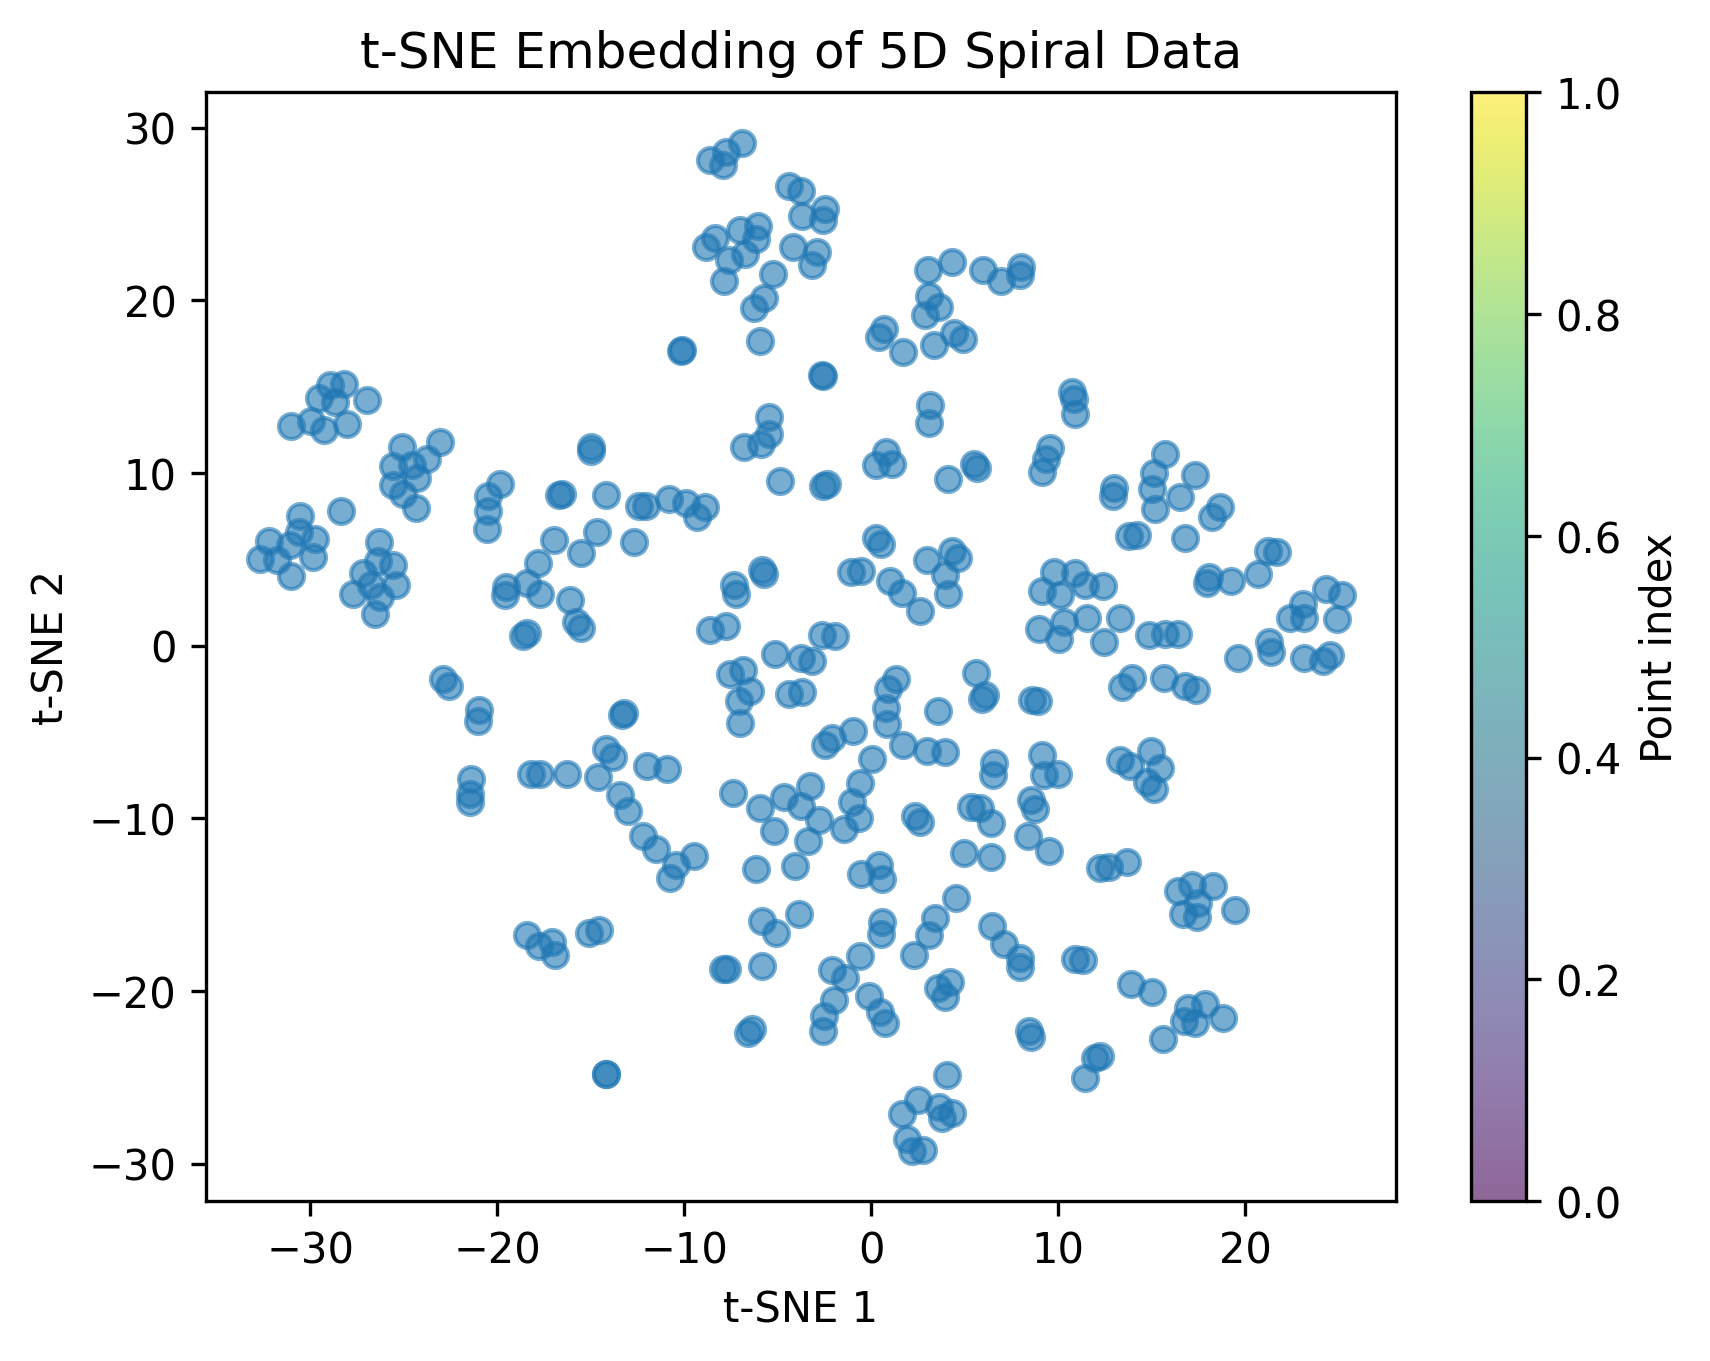

In [32]:
plot_phate(res[layer].cpu())
plot_tsne( res[layer].cpu())

Calculating PHATE...
  Running PHATE on 18 observations and 4096 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.04 seconds.


/home/ubuntu/taker/.venv/lib/python3.9/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (18, 4096) is expensive. Consider setting n_pca.
  warnings.warn(
/tmp/ipykernel_221832/3512312992.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_phate[:, 0], data_phate[:, 1], cmap='Spectral', alpha=0.6)


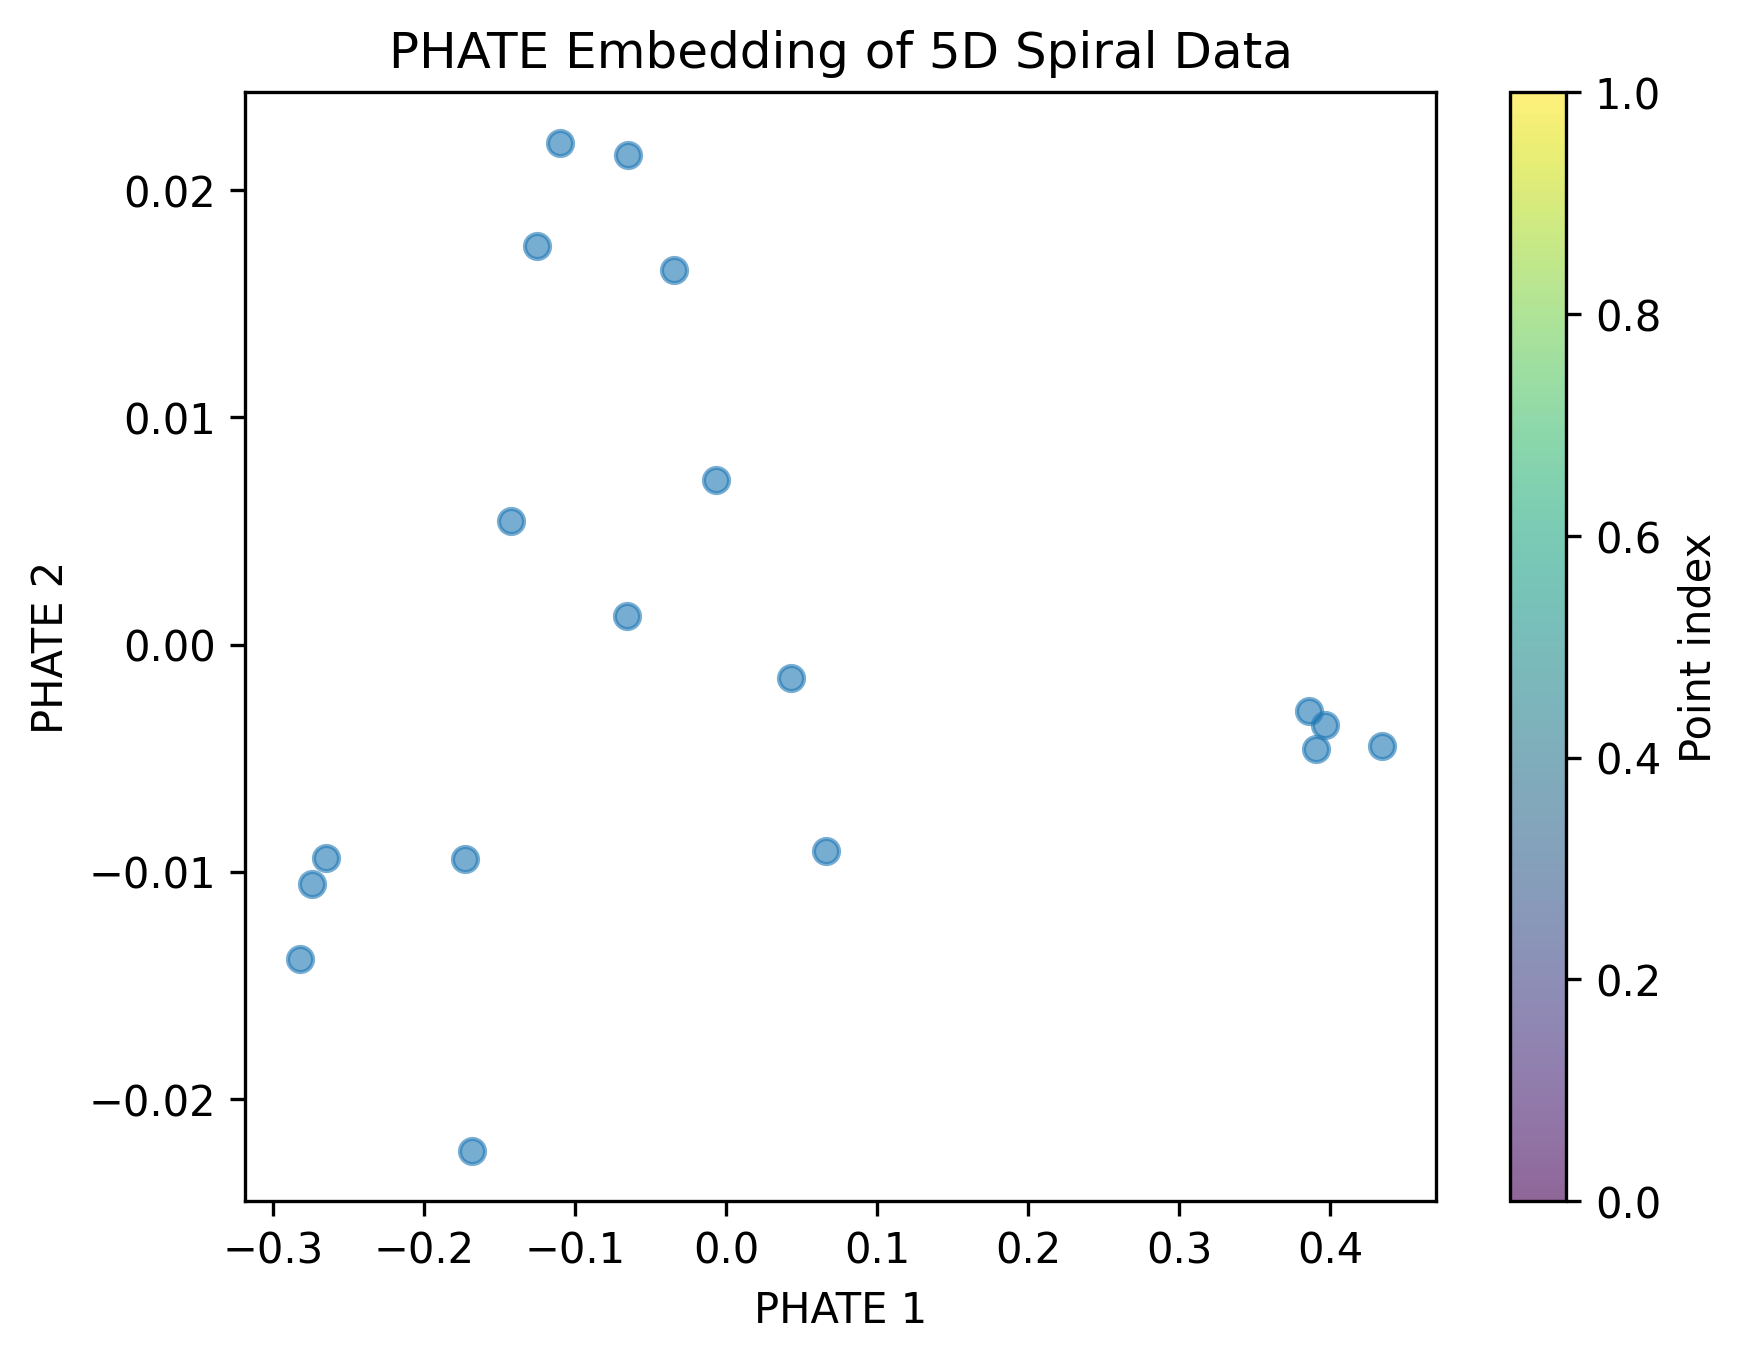

ValueError: perplexity must be less than n_samples

In [31]:
plot_phate(cpu_vecs)
plot_tsne(cpu_vecs)